#  A correlation analysis will be performed between sentiment polarity and various metrics related to property attributes and host services.


###Sentiment Analysis
First, you need to perform sentiment analysis on the reviews to classify them as positive, negative, or neutral. Sentiment analysis can be accomplished using a library such as NLTK in Python.

###Correlation Analysis
Once we have sentiment scores for each review, we can examine their correlation with various other factors. These factors could be numerical or categorical attributes related to the Airbnb listings, such as price, number of bedrooms, location, host response time, cleanliness rating, and so on.

# Data
### Seattle Airbnb Open Data
Datasets used: http://insideairbnb.com/get-the-data/

## Table of Content

- Getting Started, importing and understanding data
- Data Preprocessing and Preparation, cleaning data, Feature Engineering
- Unsupervised Sentiment Analysis
- Sentiment Prediction using Vader
- Correlation analysis betwee Sentiment and other factors
- Visualizing HeatMap and ScatterPlot

# Getting Started

In [1]:
#install vaderSentiment
!pip install vaderSentiment

Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Import necessary libraries for date and numerical operations.
from datetime import datetime, date
import numpy as np
import pandas as pd

# For sentiment analysis
import nltk

# Import SentimentIntensityAnalyzer for sentiment analysis using VADER.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')  # Download the vader lexicon for sentiment analysis.

# For text preprocessing, analysis, and categorizing
import string  # For string operations like punctuation checks.
from collections import Counter  # To count word frequencies.
from nltk.corpus import stopwords  # To get a list of stopwords.
from nltk.tokenize import word_tokenize  # To tokenize sentences into words.
from nltk.tokenize import WhitespaceTokenizer  # Alternative tokenizer based on whitespace.
from nltk.stem import WordNetLemmatizer  # For lemmatizing words (e.g., running -> run).
import nltk  # Natural Language Toolkit
from nltk.corpus import wordnet  # To get word meanings.
from wordcloud import WordCloud  # To generate word clouds.

# Downloading necessary datasets from nltk for text processing.
nltk.download('stopwords')  # Download list of stopwords.
nltk.download('averaged_perceptron_tagger')  # Download POS tagger.
nltk.download('wordnet')  # Download WordNet database for lemmatization.

# For visualization
from plotly.subplots import make_subplots  # To make subplots using Plotly.
import plotly.graph_objects as go  # To create different types of plots using Plotly.
import plotly.express as px  # Express module of Plotly for simplified plotting.
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations.
import seaborn as sns
import plotly.express as px



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Setting colab table display options

In [4]:
# Set the display width for columns when viewing DataFrames. This is useful if you have very wide DataFrames.
pd.set_option('display.width', 1000)

# Set the maximum number of columns to be displayed when displaying a DataFrame. This prevents the display from truncating the view if there are too many columns.
#pd.set_option('max_columns', 500)

# Set the maximum number of rows to be displayed when displaying a DataFrame. This prevents the display from truncating the view if there are too many rows.
#pd.set_option('display.max_rows', 500)


## Gather: Import Data

In [5]:
calendar = pd.read_csv('/content/drive/MyDrive/Extras/London/calendar.csv')
listings = pd.read_csv('/content/drive/MyDrive/Extras/London/listings.csv')
rev = pd.read_csv('/content/drive/MyDrive/Extras/London/reviews.csv')

#Reducing dataset to 5% randomly
reviews = rev.sample(frac=0.05)



In [6]:

print(listings.shape)
listings.sample(2)

(81791, 75)


id                                      listing_url       scrape_id last_scraped       source                                               name                                        description neighborhood_overview                                        picture_url    host_id  ... review_scores_communication review_scores_location review_scores_value license instant_bookable calculated_host_listings_count calculated_host_listings_count_entire_homes calculated_host_listings_count_private_rooms calculated_host_listings_count_shared_rooms reviews_per_month
61001  723672272614375667  https://www.airbnb.com/rooms/723672272614375667  20230608145305   2023-06-09  city scrape  Condo in Greater London · 1 bedroom · 1 bed · ...  Brand new to Airbnb, this is a stylish, sunlit...                   NaN  https://a0.muscache.com/pictures/miso/Hosting-...  310387174  ...                        5.00                   5.00                5.00     NaN                f                              2                                           2                                            0                                           0              0.26
64916  772546690309654514  https://www.airbnb.com/rooms/772546690309654514  20230608145305   2023-06-09  city scrape  Bed and breakfast in Greater London · ★4.83 · ...  A double bedroom with a private toilet and nic...                   NaN  https://a0.muscache.com/pictures/071d5945-895e...   93905344  ...                        4.94                   4.67                4.71     NaN                t                              5                                           0                                            5                                           0              8.30

[2 rows x 75 columns]

In [7]:
print(reviews.shape)
reviews.head()

(73375, 6)


listing_id         id        date  reviewer_id reviewer_name                                           comments
277641     6831621   41979049  2015-08-10     16214532          Emma  So pleased that I was able to book this lovely...
40608       470503  170320800  2017-07-15    123557808         Chris  Very welcoming flat close to good transport li...
416264    12301456   93469763  2016-08-12     52909320          Andy  Great location. Quick and polite comms. Would ...
46092       509099   41991356  2015-08-10     24626526          Iris  Great host and great house. Old pics from one ...
188275     3941287   19992893  2014-09-21     14738947         David  Great room as described. We met Kamal's assist...

In [8]:
print(calendar.shape)
calendar.head()

(29853384, 7)


listing_id        date available   price adjusted_price  minimum_nights  maximum_nights
0       13913  2023-06-09         f  $79.00         $79.00             1.0            29.0
1       13913  2023-06-10         f  $79.00         $79.00             1.0            29.0
2       13913  2023-06-11         f  $79.00         $79.00             1.0            29.0
3       13913  2023-06-12         t  $79.00         $79.00             1.0            29.0
4       13913  2023-06-13         t  $79.00         $79.00             1.0            29.0

# Data Preprocessing and Preparation, Cleaing data, Feature Engineering


### 1. Convert strings of true, false to 1 and 0 in specific columns

In [9]:
def convert_tf(df, columns, true_value='t'):
    """
    Convert specific columns of a DataFrame from string true/false values to integers 1 and 0.

    Parameters:
    - df (DataFrame): The DataFrame to modify.
    - columns (list): List of column names that need to be converted.
    - true_value (str): The string value that represents 'true'. Defaults to 't'.
    """

    # Loop through each column specified in the 'columns' list
    for c in columns:
        # Use a list comprehension to set the column's value to 1 if it matches the 'true_value' and 0 otherwise.
        df[c] = [1 if i == true_value else 0 for i in df[c]]


In [10]:
convert_tf(listings, ['host_is_superhost', 'has_availability', 'instant_bookable'],
          't')

In [11]:
convert_tf(calendar, ['available'], 't')

### 2. Conver the price and extra fee column to numeric

In [12]:
def convert_str_to_num(df, columns):
    for col in columns:
        # Convert the entire column to string
        df[col] = df[col].astype(str)

        # Remove $ and , from the price column
        df[col] = df[col].str.replace('$', '').str.replace(',', '')

        # Convert empty strings to NaN
        df[col] = df[col].replace('', pd.NA)

        # Convert to numeric, coercing any errors
        df[col] = pd.to_numeric(df[col], errors='coerce')

    return df

# Usage
calendar = convert_str_to_num(calendar, ['price'])



<ipython-input-12-7b43be5d45e0>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('$', '').str.replace(',', '')


In [13]:
convert_str_to_num(calendar, ['price'])

<ipython-input-12-7b43be5d45e0>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('$', '').str.replace(',', '')


listing_id        date  available  price adjusted_price  minimum_nights  maximum_nights
0                      13913  2023-06-09          0   79.0         $79.00             1.0            29.0
1                      13913  2023-06-10          0   79.0         $79.00             1.0            29.0
2                      13913  2023-06-11          0   79.0         $79.00             1.0            29.0
3                      13913  2023-06-12          1   79.0         $79.00             1.0            29.0
4                      13913  2023-06-13          1   79.0         $79.00             1.0            29.0
...                      ...         ...        ...    ...            ...             ...             ...
29853379  909281506879757665  2024-06-03          0  135.0        $135.00            21.0           181.0
29853380  909281506879757665  2024-06-04          0  135.0        $135.00            21.0           180.0
29853381  909281506879757665  2024-06-05          0  135.0        $135.00            21.0           179.0
29853382  909281506879757665  2024-06-06          0  135.0        $135.00            21.0           178.0
29853383  909281506879757665  2024-06-07          0  135.0        $135.00            21.0           177.0

[29853384 rows x 7 columns]

In [14]:
#Applying the above funtion to slected columns
convert_str_to_num(listings, ['price'])

<ipython-input-12-7b43be5d45e0>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('$', '').str.replace(',', '')


id                                      listing_url       scrape_id last_scraped           source                                               name                                        description                              neighborhood_overview                                        picture_url    host_id  ... review_scores_communication review_scores_location review_scores_value license instant_bookable calculated_host_listings_count calculated_host_listings_count_entire_homes calculated_host_listings_count_private_rooms  calculated_host_listings_count_shared_rooms reviews_per_month
0                  154221              https://www.airbnb.com/rooms/154221  20230608145305   2023-06-10  previous scrape  Rental unit in London · 2 bedrooms · 2 beds · ...  hi, i am renting my 2 bedroom flat in Pimlico ...  a very save area of central London , Pimlico i...  https://a0.muscache.com/pictures/3510524/72655...     211018  ...                        5.00                   5.00                5.00     NaN                0                              1                                           1                                            0                                            0              0.01
1                  157714              https://www.airbnb.com/rooms/157714  20230608145305   2023-06-09      city scrape  Townhouse in Hammersmith · ★4.71 · 1 bedroom ·...  Large, light and spacious loft bedroom with a ...  The neighbourhood is extremely convenient for ...  https://a0.muscache.com/pictures/4129744/10db5...     757377  ...                        4.83                   4.76                4.66     NaN                0                              1                                           0                                            1                                            0              1.21
2                   13913               https://www.airbnb.com/rooms/13913  20230608145305   2023-06-09      city scrape  Rental unit in Islington · ★4.80 · 1 bedroom ·...  My bright double bedroom with a large window h...  Finsbury Park is a friendly melting pot commun...  https://a0.muscache.com/pictures/miso/Hosting-...      54730  ...                        4.82                   4.69                4.69     NaN                0                              2                                           1                                            1                                            0              0.26
3                   15400               https://www.airbnb.com/rooms/15400  20230608145305   2023-06-09      city scrape  Rental unit in London · ★4.80 · 1 bedroom · 1 ...  Lots of windows and light.  St Luke's Gardens ...                                     It is Chelsea.  https://a0.muscache.com/pictures/428392/462d26...      60302  ...                        4.83                   4.93                4.74     NaN                0                              1                                           1                                            0                                            0              0.57
4                  306333              https://www.airbnb.com/rooms/306333  20230608145305   2023-06-09      city scrape  Rental unit in London · ★4.32 · 2 bedrooms · 3...  Welcome to my lovely 2-bedroom flat in Hoxton!...  In Shoreditch, empty walls are future murals. ...  https://a0.muscache.com/pictures/32c818d1-7762...    1573870  ...                        4.84                   4.89                4.53     NaN                0                              1                                           1                                            0                                            0              0.25
...                   ...                                              ...             ...          ...              ...                                                ...                                                ...                                                ...                              

In [15]:
calendar['price'].head(2)

0    79.0
1    79.0
Name: price, dtype: float64

In [16]:
listings['price'].head(2)

0    83.0
1    69.0
Name: price, dtype: float64

### 3. Create calendar_df: group by the listing and check the average price of each listing
- we probably don't need daily price information in this analysis

In [17]:
listings.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
   

In [18]:
calendar_df = calendar[calendar['available']== True].groupby('listing_id')['price'].mean().reset_index()

In [19]:
calendar_df.sample(5)

listing_id       price
18448            46037429   65.000000
43654  841539187247348074   93.677165
51019  895193560762676714  137.272727
12289            32626014   65.000000
48336  878210376311197844  376.000000

### 4. Drop some uneeded columns in the listing datasets, mostly website URLs

In [20]:
listings = listings.drop([ 'host_thumbnail_url', 'host_picture_url', 'host_url', 'picture_url', 'listing_url',
                         'scrape_id', 'last_scraped', 'name', 'host_id', 'host_name','calendar_last_scraped' ]  , axis=1)

In [21]:
listings.head(2)

id           source                                        description                              neighborhood_overview  host_since           host_location                                         host_about  host_response_time host_response_rate host_acceptance_rate  ...  review_scores_communication review_scores_location  review_scores_value  license instant_bookable calculated_host_listings_count calculated_host_listings_count_entire_homes calculated_host_listings_count_private_rooms calculated_host_listings_count_shared_rooms  reviews_per_month
0  154221  previous scrape  hi, i am renting my 2 bedroom flat in Pimlico ...  a very save area of central London , Pimlico i...  2010-08-24             Rome, Italy  i love to travel and therefor want to give my ...                 NaN                NaN                  NaN  ...                         5.00                   5.00                 5.00      NaN                0                              1                                           1                                            0                                           0               0.01
1  157714      city scrape  Large, light and spacious loft bedroom with a ...  The neighbourhood is extremely convenient for ...  2011-06-29  London, United Kingdom  Eilinn, Yoon our daughters Surei and Sukyi wou...  within a few hours                90%                  68%  ...                         4.83                   4.76                 4.66      NaN                0                              1                                           0                                            1                                           0               1.21

[2 rows x 64 columns]

### 5. Convert "host_since" column into a number instead of a date
We can utlize hosts' years of experience as a potential feature

In [22]:
# Convert the 'host_since' column of the 'listings' DataFrame from a string format to a datetime format.
# This allows for more efficient and accurate date-time operations on this column.
listings['host_since'] = pd.to_datetime(listings['host_since'])


In [23]:
# Know the last date of this data sets so that we have an end date to calculate days of experience
date_end = calendar['date'].max()
print(date_end)

2024-06-10


In [24]:
# Calculate the experience of the host in terms of days.
# Subtract the 'host_since' date from a specified end date ('date_end') to get the duration of host experience.
listings['host_exp_days']  = (datetime.strptime(date_end, '%Y-%m-%d') - listings['host_since'])

# Convert the timedelta object (which represents the difference between two dates)
# to an integer representing the number of days. This creates a new column 'host_exp_days'
# that stores the experience of each host in days.
listings['host_exp_days'] = listings['host_exp_days'].dt.days


In [25]:
listings['host_exp_days'].head()

0    5039.0
1    4730.0
2    5320.0
3    5301.0
4    4539.0
Name: host_exp_days, dtype: float64

### 6. Create another column that shows hosts' experience in number of years

In [26]:
#Creating a column that shows host experience
listings['host_exp_year']=listings['host_exp_days']/365

In [27]:
listings['host_exp_year']

0        13.805479
1        12.958904
2        14.575342
3        14.523288
4        12.435616
           ...    
81786     4.523288
81787     4.523288
81788     8.975342
81789     1.013699
81790     1.263014
Name: host_exp_year, Length: 81791, dtype: float64

### 7. Convert host response rate and acceptance into a proper float format
The current format is a weird string

In [28]:
listings[['host_response_rate', 'host_acceptance_rate']].head()

host_response_rate host_acceptance_rate
0                NaN                  NaN
1                90%                  68%
2               100%                  78%
3               100%                  47%
4               100%                 100%

In [29]:
def convert_rate_col(df, columns):
    """Convert columns with percentage strings to float values."""

    for column in columns:
        # Remove the '%' character and convert the string to a float.
        df[column] = df[column].str.replace("%", "").astype("float")

        # Divide by 100 to get the percentage in decimal format (e.g., "50%" becomes 0.50).
        df[column] = df[column]/100


In [30]:
#Applying above function
convert_rate_col(listings, ['host_response_rate', 'host_acceptance_rate'])

In [31]:
listings[['host_response_rate', 'host_acceptance_rate']].head()

host_response_rate  host_acceptance_rate
0                 NaN                   NaN
1                 0.9                  0.68
2                 1.0                  0.78
3                 1.0                  0.47
4                 1.0                  1.00

# Missing Data

### Check missing data

In [32]:

np.sum(listings.isnull())==0

id                                               True
source                                           True
description                                     False
neighborhood_overview                           False
host_since                                      False
                                                ...  
calculated_host_listings_count_private_rooms     True
calculated_host_listings_count_shared_rooms      True
reviews_per_month                               False
host_exp_days                                   False
host_exp_year                                   False
Length: 66, dtype: bool

In [33]:
np.sum(reviews.isnull())==0

listing_id        True
id                True
date              True
reviewer_id       True
reviewer_name     True
comments         False
dtype: bool

In [34]:
np.sum(calendar.isnull())==0

listing_id         True
date               True
available          True
price             False
adjusted_price    False
minimum_nights    False
maximum_nights    False
dtype: bool

# Unsupervised Sentiment Prediction & Analysis

### 1. Drop the rows with missing comments in the reviews data

In [35]:
reviews = reviews.dropna(subset=['comments'])

### 2. Initiate a Sentiment Intensity Analyzer and output an sentiment score prediction based on the comments

In [36]:
# Import the SentimentIntensityAnalyzer from the vaderSentiment library.
# This tool provides sentiment scores based on the given text.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create an instance of the SentimentIntensityAnalyzer, which will be used
# to compute sentiment scores for text.
analyser = SentimentIntensityAnalyzer()


In [37]:
reviews.head()

listing_id         id        date  reviewer_id reviewer_name                                           comments
277641     6831621   41979049  2015-08-10     16214532          Emma  So pleased that I was able to book this lovely...
40608       470503  170320800  2017-07-15    123557808         Chris  Very welcoming flat close to good transport li...
416264    12301456   93469763  2016-08-12     52909320          Andy  Great location. Quick and polite comms. Would ...
46092       509099   41991356  2015-08-10     24626526          Iris  Great host and great house. Old pics from one ...
188275     3941287   19992893  2014-09-21     14738947         David  Great room as described. We met Kamal's assist...

# Sentiment Prediction using Vader
#### Getting a predicted sentiment compound scores using Vader Sentiment Intensity Analyzer and add it as a column

In [38]:
# Define a lambda function that calculates the compound sentiment score of a given text
# using the VADER sentiment analysis tool.
function = lambda title: analyser.polarity_scores(title)['compound']

# Apply the defined lambda function to each row in the 'comments' column of the 'reviews' DataFrame.
# Store the resultant compound sentiment scores in a new column named 'compound'.
reviews['compound'] = reviews['comments'].apply(function)


In [39]:
reviews.head()

listing_id         id        date  reviewer_id reviewer_name                                           comments  compound
277641     6831621   41979049  2015-08-10     16214532          Emma  So pleased that I was able to book this lovely...    0.9872
40608       470503  170320800  2017-07-15    123557808         Chris  Very welcoming flat close to good transport li...    0.9381
416264    12301456   93469763  2016-08-12     52909320          Andy  Great location. Quick and polite comms. Would ...    0.8591
46092       509099   41991356  2015-08-10     24626526          Iris  Great host and great house. Old pics from one ...    0.9804
188275     3941287   19992893  2014-09-21     14738947         David  Great room as described. We met Kamal's assist...    0.9769

### Adding positive scores

In [40]:
# Define a lambda function that calculates the positive sentiment score of a given text
# using the VADER sentiment analysis tool.
function = lambda title: analyser.polarity_scores(title)['pos']

# Apply the defined lambda function to each row in the 'comments' column of the 'reviews' DataFrame.
# Store the resultant positive sentiment scores in a new column named 'positive_score'.
reviews['positive_score'] = reviews['comments'].apply(function)


In [41]:
reviews.head()

listing_id         id        date  reviewer_id reviewer_name                                           comments  compound  positive_score
277641     6831621   41979049  2015-08-10     16214532          Emma  So pleased that I was able to book this lovely...    0.9872           0.253
40608       470503  170320800  2017-07-15    123557808         Chris  Very welcoming flat close to good transport li...    0.9381           0.402
416264    12301456   93469763  2016-08-12     52909320          Andy  Great location. Quick and polite comms. Would ...    0.8591           0.613
46092       509099   41991356  2015-08-10     24626526          Iris  Great host and great house. Old pics from one ...    0.9804           0.264
188275     3941287   19992893  2014-09-21     14738947         David  Great room as described. We met Kamal's assist...    0.9769           0.185

# Rule based Sentiment Classification using the predicted score
### Based on the sentiment score, classify the type of customer review sentiment into positive, negative and neutral


#### About the Scoring
The output from Vader sentiment Analyzer - compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate.

It is also useful for researchers who would like to set standardized thresholds for classifying sentences as either positive, neutral, or negative. Typical threshold values (used in the literature cited on this page) are:1 to 0


In [42]:
def func(x):
    """
    Categorize sentiment based on the compound score.

    Parameters:
    - x (float): Compound sentiment score.

    Returns:
    - int: Returns 1 for positive sentiment, -1 for negative sentiment, and 0 for neutral.
    """

    # If the compound sentiment score is greater than 0.8, classify as positive sentiment.
    if x > 0.8:
        return 1
    # If the compound sentiment score is less than -0.5, classify as negative sentiment.
    elif x < -0.5:
        return -1
    # For other scores, classify as neutral sentiment.
    else:
        return 0

    # Add more elif statements as needed to refine the sentiment categorization...

# Apply the defined function to each row in the 'compound' column of the 'reviews' DataFrame.
# Store the resultant sentiment categories in a new column named 'sentiment'.
reviews['sentiment'] = reviews['compound'].apply(func)


In [43]:
def func(x):
    """
    Categorize sentiment based on the compound score.

    Parameters:
    - x (float): Compound sentiment score.

    Returns:
    - int: Returns 1 for positive sentiment, -1 for negative sentiment, and 0 for neutral.
    """

    # If the compound sentiment score is greater than 0.8, classify as positive sentiment.
    if x > 0.8:
        return "postive"
    # If the compound sentiment score is less than -0.5, classify as negative sentiment.
    elif x < -0.5:
        return "negative"
    # For other scores, classify as neutral sentiment.
    else:
        return "neutral"

    # Add more elif statements as needed to refine the sentiment categorization...

# Apply the defined function to each row in the 'compound' column of the 'reviews' DataFrame.
# Store the resultant sentiment categories in a new column named 'sentiment'.
reviews['sentiment_'] = reviews['compound'].apply(func)


In [44]:
reviews.sample(10)

listing_id                  id        date  reviewer_id reviewer_name                                           comments  compound  positive_score  sentiment sentiment_
144747      2557892            82884454  2016-06-30     62539343       Daeyeob  호스트 엄청 좋아요!!<br/>별로 터치도안하고 서로서로 밤늦게 들어와서 그리 마주...    0.0000           0.000          0    neutral
1241565    52824010  722994589010320307  2022-09-24    136353307      Songyang     距离地铁站很近，房间不大，但是很干净。房间隔音效果不好，晚上路上的汽车很吵，此外没什么缺点。    0.0000           0.000          0    neutral
1071187    39494833  475209721895535379  2021-10-17     14941029         Julie  Wonderful apartment right in the heart of Chel...    0.9858           0.725          1    postive
1022087    36764639  752069949193585915  2022-11-03     29037309           Tim  We had a great stay at Rajnis place. It is eas...    0.7579           0.220          0    neutral
731112     21858600           233018032  2018-02-07    136078904           Ian  The host canceled this reservation 16 days bef...    0.0000           0.000          0    neutral
1193938    50194915  427364671108853239  2021-08-12    260133956        Haydar  Barbara was the best host we could have asked ...    0.9652           0.348          1    postive
900533     29752859           544565231  2019-10-10    295392969          Tony  Liz was a good host and offers a basement room...    0.8555           0.251          1    postive
198728      4109997           445379870  2019-04-29    146657621         Debra  This was the perfect stay for my recent holida...    0.9562           0.230          1    postive
79812        999835            46274057  2015-09-09     27269437       Kristen  This was our second stay at Stepney House. Our...    0.8997           0.366          1    postive
1209919    51104977  632395041594875270  2022-05-22    405750679        Joanne  Great place to stay for work, was exactly what...    0.6588           0.305          0    neutral

# Some Data processing again

### Aggregate the review data based on sentiment classification we got above and join it with the listing data sets.

In [45]:
# Group the 'reviews' DataFrame by the 'listing_id' and 'sentiment' columns.
# Calculate the mean of the 'positive_score' and 'compound' columns for each group.
# The 'reset_index()' method is used to convert the group labels back to columns in the resulting DataFrame.
reviews_agg = reviews.groupby(['listing_id', 'sentiment'])['positive_score', 'compound'].mean().reset_index()


<ipython-input-45-dcda98fd8cb2>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  reviews_agg = reviews.groupby(['listing_id', 'sentiment'])['positive_score', 'compound'].mean().reset_index()


In [46]:
reviews_agg.head()

listing_id  sentiment  positive_score  compound
0       13913          1        0.336000  0.970100
1       15400          0        0.055000  0.406900
2       15400          1        0.230222  0.938733
3       17402          0        0.133000  0.690800
4       17402          1        0.246000  0.990500

In [47]:
# Merge the 'listings' and 'reviews' DataFrames using an inner join.
# The merge is based on the 'id' column from the 'listings' DataFrame and the 'listing_id' column from the 'reviews' DataFrame.
# This means only rows with matching 'id' and 'listing_id' values will be included in the merged DataFrame 'df_all'.
df_all = pd.merge(listings, reviews, how='inner', left_on=['id'], right_on=['listing_id'])


In [48]:
df_all.head(2)

id_x       source                                        description                              neighborhood_overview host_since           host_location                                         host_about  host_response_time  host_response_rate  host_acceptance_rate  ...  listing_id       id_y        date  reviewer_id reviewer_name                                           comments compound positive_score sentiment  sentiment_
0  157714  city scrape  Large, light and spacious loft bedroom with a ...  The neighbourhood is extremely convenient for ... 2011-06-29  London, United Kingdom  Eilinn, Yoon our daughters Surei and Sukyi wou...  within a few hours                 0.9                  0.68  ...      157714  528135523  2019-09-12     84166853        Kieran  Superb host with excellent room and facilities...   0.9601          0.566         1     postive
1  157714  city scrape  Large, light and spacious loft bedroom with a ...  The neighbourhood is extremely convenient for ... 2011-06-29  London, United Kingdom  Eilinn, Yoon our daughters Surei and Sukyi wou...  within a few hours                 0.9                  0.68  ...      157714     453773  2011-08-17       853479         Brian  Eilinn and Yoon were very helpful from the beg...   0.9885          0.166         1     postive

[2 rows x 76 columns]

###Top neighbours based on max number of reviews

In [49]:
# # Group by 'neighbourhood' and sum the reviews, then sort in descending order and take the top 20
# top_neighbourhoods = df_all.groupby('neighbourhood_cleansed')['number_of_reviews'].sum().sort_values(ascending=False).head(20)

# print(top_neighbourhoods)


df_group = df_all.groupby(['sentiment', 'neighbourhood_cleansed']).size().reset_index().rename(columns={0: 'count_reviews'})

df_group.head()

sentiment neighbourhood_cleansed  count_reviews
0         -1   Barking and Dagenham              6
1         -1                 Barnet             23
2         -1                 Bexley              4
3         -1                  Brent             62
4         -1                Bromley              6

In [50]:
df_top_neighbour_list= df_group.groupby(['neighbourhood_cleansed' ])['count_reviews'].sum().sort_values(ascending = False).reset_index().iloc[:5, 0].unique().tolist()

df_top_neighbour_list

['Westminster',
 'Camden',
 'Tower Hamlets',
 'Southwark',
 'Kensington and Chelsea']

###Host_Response_Time

In [51]:
def map_values(row):
    """
    Map string values of 'host_response_time' to a numerical score.

    Parameters:
    - row (str): The string value to be mapped.

    Returns:
    - float: The mapped numerical score.
    """

    # If the response time is 'N/A', assign a score of 0.
    if row == 'N/A':
        return 0
    # If the host responds 'within an hour', assign a score of 1.
    elif row == 'within an hour':
        return 1
    # If the host responds 'within a few hours', assign a score of 0.8.
    elif row == 'within a few hours':
        return 0.8
    # If the host responds 'within a day', assign a score of 0.6.
    elif row == 'within a day':
        return 0.6
    # For any other response times, assign a default score of 0.1.
    else:
        return 0.1

# Apply the 'map_values' function to each row in the 'host_response_time' column of the 'df_all' DataFrame.
# The resulting values replace the original values in the 'host_response_time' column.
df_all['host_response_time']


0        within a few hours
1        within a few hours
2        within a few hours
3        within a few hours
4        within a few hours
                ...        
73359        within an hour
73360                   NaN
73361        within an hour
73362        within an hour
73363        within an hour
Name: host_response_time, Length: 73364, dtype: object

###Property_type

In [52]:
def map_values(row):
    """
    Convert 'property_type' string descriptions into corresponding numerical scores.

    Parameters:
    - row (str): The property type description.

    Returns:
    - float: The numerical score assigned for the specified property type.
    """

    # If the property type is 'apartment', assign a score of 0.4.
    if row == 'apartment':
        return 0.4
    # If the property type is 'house', assign a score of 1.
    elif row == 'house':
        return 1
    # If the property type is 'condo', assign a score of 0.8.
    elif row == 'condo':
        return 0.8
    # For any other property types, assign a default score of 0.
    else:
        return 0

# Apply the 'map_values' function to the 'property_type' column of the 'df_all' DataFrame.
# This transforms the property type descriptions into a numerical format,
# which can be more suitable for quantitative analysis or modeling.
df_all['property_type_'] = df_all['property_type'].apply(map_values)


In [53]:
df_all.head(5)

id_x       source                                        description                              neighborhood_overview host_since           host_location                                         host_about  host_response_time  host_response_rate  host_acceptance_rate  ...       id_y        date  reviewer_id  reviewer_name                                           comments compound positive_score sentiment sentiment_  property_type_
0  157714  city scrape  Large, light and spacious loft bedroom with a ...  The neighbourhood is extremely convenient for ... 2011-06-29  London, United Kingdom  Eilinn, Yoon our daughters Surei and Sukyi wou...  within a few hours                 0.9                  0.68  ...  528135523  2019-09-12     84166853         Kieran  Superb host with excellent room and facilities...   0.9601          0.566         1    postive               0
1  157714  city scrape  Large, light and spacious loft bedroom with a ...  The neighbourhood is extremely convenient for ... 2011-06-29  London, United Kingdom  Eilinn, Yoon our daughters Surei and Sukyi wou...  within a few hours                 0.9                  0.68  ...     453773  2011-08-17       853479          Brian  Eilinn and Yoon were very helpful from the beg...   0.9885          0.166         1    postive               0
2  157714  city scrape  Large, light and spacious loft bedroom with a ...  The neighbourhood is extremely convenient for ... 2011-06-29  London, United Kingdom  Eilinn, Yoon our daughters Surei and Sukyi wou...  within a few hours                 0.9                  0.68  ...  365297734  2019-01-01    229405070          Ryota                      とても安心して泊まることができます。お家もとても清潔です。   0.0000          0.000         0    neutral               0
3  157714  city scrape  Large, light and spacious loft bedroom with a ...  The neighbourhood is extremely convenient for ... 2011-06-29  London, United Kingdom  Eilinn, Yoon our daughters Surei and Sukyi wou...  within a few hours                 0.9                  0.68  ...   19798771  2014-09-18     12438746           Ruth                   Great location and a comfy room    0.6249          0.451         0    neutral               0
4  157714  city scrape  Large, light and spacious loft bedroom with a ...  The neighbourhood is extremely convenient for ... 2011-06-29  London, United Kingdom  Eilinn, Yoon our daughters Surei and Sukyi wou...  within a few hours                 0.9                  0.68  ...     543376  2011-09-18       541076           Jimi  Even though Ei-Linn thought that I was suppose...   0.9942          0.182         1    postive               0

[5 rows x 77 columns]

In [54]:
df_all.columns.values

array(['id_x', 'source', 'description', 'neighborhood_overview',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
       'calendar_updated', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', '

# Correlational analysis

###Correlation between Sentiment and Property Attributes

In [55]:
# Create a subset of the 'df_all' DataFrame containing only the columns related to hosts and their reviews.
Host_correlation = df_all[[ 'host_response_time',
                           'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'number_of_reviews',
                           'review_scores_rating', 'review_scores_accuracy',
                           'review_scores_cleanliness','sentiment', 'review_scores_checkin',
                           'review_scores_communication', 'review_scores_location',
                           'review_scores_value',
                           'reviews_per_month', 'host_exp_days', 'host_exp_year']].corr()

# Get the correlation of the 'sentiment' column with other columns.
sentiment_correlation = Host_correlation['sentiment']

# Print the computed sentiment correlation.
#print(sentiment_correlation)


<ipython-input-55-1f7fc2c5b71d>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'reviews_per_month', 'host_exp_days', 'host_exp_year']].corr()


###Heatmap for Property Attributes

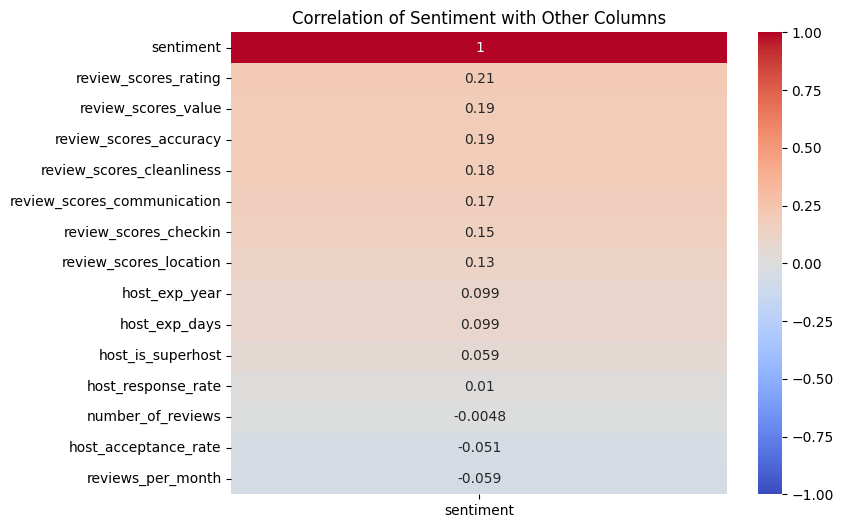

In [56]:
# Use seaborn's heatmap function to visualize the correlation of 'sentiment' with other columns
plt.figure(figsize=(8, 6))
sns.heatmap(sentiment_correlation.sort_values(ascending=False).to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Sentiment with Other Columns')
plt.show()



###Box plot between 'Sentiment' and 'Review Scores Cleanliness'

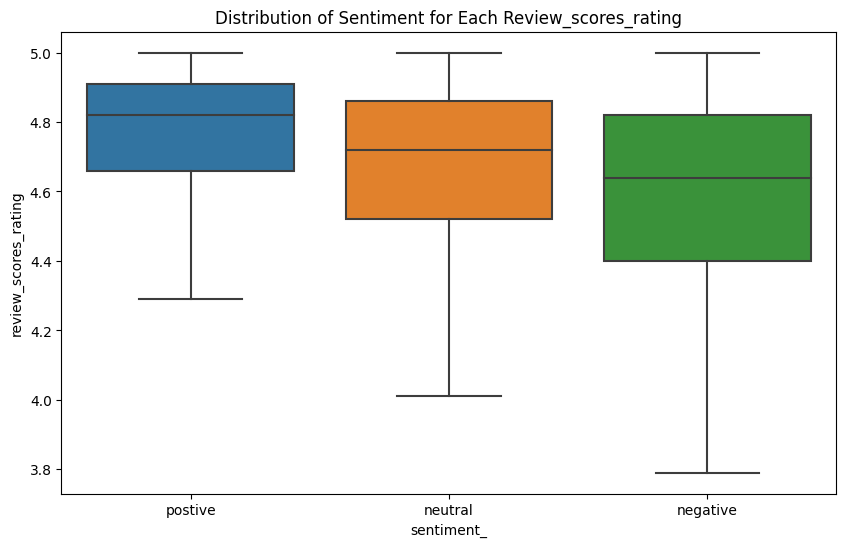

In [57]:
# Initialize a new figure with a specified size.
plt.figure(figsize=(10,6))

# Use Seaborn's boxplot function to visualize the distribution of sentiment for each unique review score rating.
sns.boxplot(data=df_all,
            x='sentiment_',
            y='review_scores_rating',
            showfliers=False)  # showfliers=False removes the outliers

# Set the title for the box plot.
plt.title('Distribution of Sentiment for Each Review_scores_rating')

# Display the box plot.
plt.show()


###Correlation between Sentiment and Property Attributes

In [58]:
# Create a subset of the 'df_all' DataFrame containing only the columns related to property attributes.
# Calculate the correlation matrix for these selected columns.
# The correlation matrix helps determine how different property attributes relate linearly with each other.
Property_attributes_correlation = df_all[['property_type', 'latitude', 'room_type', 'accommodates',
                                          'bedrooms', 'beds','amenities', 'price',
                                          'availability_90', 'availability_60','sentiment', 'availability_30',
                                          'availability_365', 'has_availability', 'instant_bookable', 'maximum_nights',
                                          'minimum_nights', 'longitude', 'latitude']].corr()
# Calculate correlation between sentiment and other columns
correlation_with_sentiment = Property_attributes_correlation['sentiment'].sort_values(ascending=False)

# Print the correlation values
#print(correlation_with_sentiment)


<ipython-input-58-9b0de4f4066e>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'minimum_nights', 'longitude', 'latitude']].corr()


###Heatmap for Host Services

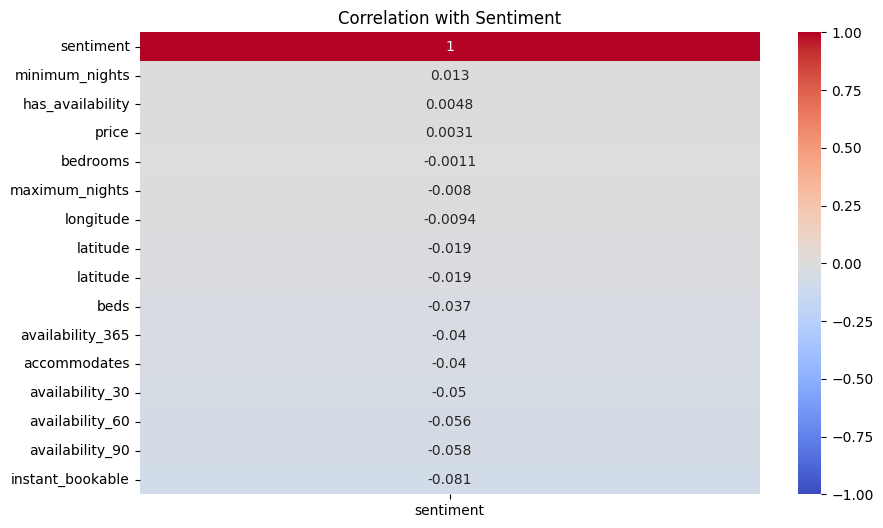

In [59]:
# Using the correlation matrix you've created
corr_matrix = Property_attributes_correlation[['sentiment']].sort_values(by='sentiment', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation with Sentiment")
plt.show()


###Box plot between 'Sentiment' and 'Price'

Scatter Plot

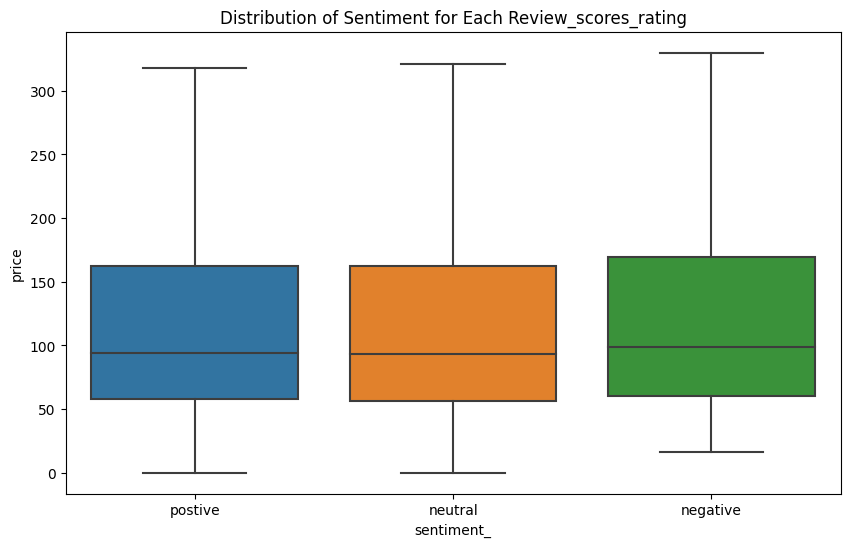

In [60]:
# Initialize a new figure with a specified size.
plt.figure(figsize=(10,6))

# Use Seaborn's boxplot function to visualize the distribution of sentiment for each unique review score rating.
sns.boxplot(data=df_all,
            x='sentiment_',
            y='price',
            showfliers=False)  # showfliers=False removes the outliers

# Set the title for the box plot.
plt.title('Distribution of Sentiment for Each Review_scores_rating')

# Display the box plot.
plt.show()


###Grouping by some columns

In [61]:
df_listing_agg = df_all.groupby(['neighbourhood_cleansed', 'id_x', 'host_response_time', 'sentiment', 'host_is_superhost', 'property_type', 'room_type', ],)['positive_score', 'compound', 'host_exp_days', 'host_exp_year','price', 'host_response_rate', 'host_acceptance_rate', 'review_scores_rating'].mean().reset_index()

<ipython-input-61-c8f207de273f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_listing_agg = df_all.groupby(['neighbourhood_cleansed', 'id_x', 'host_response_time', 'sentiment', 'host_is_superhost', 'property_type', 'room_type', ],)['positive_score', 'compound', 'host_exp_days', 'host_exp_year','price', 'host_response_rate', 'host_acceptance_rate', 'review_scores_rating'].mean().reset_index()


In [62]:
df_listing_agg.sample(2)

neighbourhood_cleansed                id_x host_response_time  sentiment  host_is_superhost          property_type        room_type  positive_score  compound  host_exp_days  host_exp_year  price  host_response_rate  host_acceptance_rate  review_scores_rating
14373   Kingston upon Thames            10183805     within an hour          0                  1         Entire cottage  Entire home/apt          0.3155    0.6984         3089.0       8.463014   89.0                 1.0                  0.99                  4.98
12178              Islington  663851302369350148     within an hour          1                  1  Private room in condo     Private room          0.3280    0.8932         3285.0       9.000000   65.0                 1.0                  0.91                  5.00

###Join the calendar_df: avg price per listing table

In [63]:
df_listing= pd.merge(df_listing_agg, calendar_df, how='left', left_on=['id_x'], right_on=['listing_id'])

In [64]:
df_listing.sample(2)

neighbourhood_cleansed                id_x host_response_time  sentiment  host_is_superhost          property_type        room_type  positive_score  compound  host_exp_days  host_exp_year  price_x  host_response_rate  host_acceptance_rate  review_scores_rating    listing_id     price_y
3960                 Camden  703628753620015511     within an hour         -1                  0  Private room in condo     Private room           0.055   -0.7845         4032.0      11.046575     63.0                 1.0                  0.94                  4.76  7.036288e+17   72.093426
4310         City of London            21912751     within an hour          1                  0     Entire rental unit  Entire home/apt           0.345    0.9216         3976.0      10.893151    140.0                 1.0                  1.00                  4.71  2.191275e+07  140.000000

###Separate the price column to several discrete values (price bins)

In [65]:
df_listing['price_bin'] = pd.cut(df_listing['price_y'], [0,100,200, 400, 600, 800, 1000],
                   labels=['0-100', '100-200','200-400','400-600', '600-800', '800-1000' ])

In [66]:
def func_response_rate(x):
    """classifiy the host response rate into >0.5 and <0.5"""
    if x > 0.5:
        return ">0.5"
    else:
        return '<0.5'
    # Add elif statements....

df_listing['host_response_rate_cat'] =df_listing['host_response_rate'].apply(func_response_rate)


###Box plot for Airbnb Customer Review Sentiment by Host Response Time

In [67]:
# 1. Determine the top 5 `property_type` based on the count of comments
# Use value_counts() to count occurrences of each unique value in the `property_type` column
# Then, get the 5 largest counts using nlargest()
top_5_property_types = df_all['property_type'].value_counts().nlargest(5).index.tolist()

# 2. Filter the df_listing dataframe
# Only include rows where the `property_type` is in the top 5 list
filtered_df = df_listing[df_listing['property_type'].isin(top_5_property_types)]

# 3. Plot using the filtered data
# Create a box plot using Plotly Express, setting x-axis as property_type and y-axis as positive_score
fig = px.box(filtered_df, x="property_type", y="positive_score", template="plotly_white",
             title="Airbnb Customer Review Positive Sentiment Score by whether host is a superhost")

# Update the x-axis properties: ticks position, tick width, and tick font size
fig.update_xaxes(ticks="outside",
                 tickwidth=2,
                 tickfont=dict(size=10))

# Update the layout: set x-axis and y-axis titles, and set the font family
fig.update_layout(xaxis_title="property type",
                 yaxis_title="Positive Sentiment Score",
                 font=dict(family="Avenir",))

# Display the figure
fig.show()


###Box plot for Positive sentiment score by Host Response Time


In [68]:

# Create a box plot using the px.box() function from Plotly Express.
# x-axis: Host Response Rate categories ('host_response_rate_cat')
# y-axis: Positive sentiment scores ('positive_score')
# Template: White theme for the plot ('plotly_white')
# category_orders: Specifies the desired order of categories on the x-axis
# Title: Specifies the title for the plot
fig = px.box(df_listing,
             x="host_response_rate_cat",
             y="positive_score",
             template="plotly_white",
             category_orders={"host_response_time": ['within an hour', 'within a few hours', 'within a day', 'a few days or more']},
             title="Airbnb Customer Review Sentiment by Host Response Time")

# Update the x-axis properties:
# Position of ticks to be outside, width of the ticks, and font size of tick labels
fig.update_xaxes(ticks="outside",
                 tickwidth=2,
                 tickfont=dict(size=10))

# Update the overall layout of the plot:
# Titles for x and y axes, and font family for the entire plot
fig.update_layout(xaxis_title="Host Response Rate",
                 yaxis_title="Positive Sentiment Score",
                 font=dict(family="Avenir",))

# Display the resulting figure
fig.show()


###Box plot for Positive sentiment score by Price Bins

In [69]:
# Create a box plot using the px.box() function from Plotly Express.
# x-axis: Host Response Rate categories ('host_response_rate_cat')
# y-axis: Positive sentiment scores ('positive_score')
# Template: White theme for the plot ('plotly_white')
# category_orders: Specifies the desired order of categories on the x-axis
# Title: Specifies the title for the plot
fig = px.box(df_listing,
             x="host_response_rate_cat",
             y="positive_score",
             template="plotly_white",
             category_orders={"host_response_time": ['within an hour', 'within a few hours', 'within a day', 'a few days or more']},
             title="Airbnb Customer Review Sentiment by Host Response Time")

# Update the x-axis properties:
# Position of ticks to be outside, width of the ticks, and font size of tick labels
fig.update_xaxes(ticks="outside",
                 tickwidth=2,
                 tickfont=dict(size=10))

# Update the overall layout of the plot:
# Titles for x and y axes, and font family for the entire plot
fig.update_layout(xaxis_title="Host Response Rate",
                 yaxis_title="Positive Sentiment Score",
                 font=dict(family="Avenir",))

# Display the resulting figure
fig.show()


###Positive Sentiment Score by top property types

In [70]:
# 1. Determine the top 5 `property_type` based on the highest frequency of comments.
# Use the value_counts() method to get a count of each unique property type.
# Then, retrieve the 5 property types with the largest counts using the nlargest() method.
top_5_property_types = df_all['property_type'].value_counts().nlargest(5).index.tolist()

# 2. Filter the df_listing dataframe to include only those rows where the `property_type`
# matches one of the top 5 property types identified in the previous step.
filtered_df = df_listing[df_listing['property_type'].isin(top_5_property_types)]

# 3. Create a box plot using the filtered data.
# x-axis represents different property types.
# y-axis represents the positive sentiment scores.
# Use the "plotly_white" theme for visualization aesthetics.
# Also, set a title for the visualization.
fig = px.box(filtered_df,
             x="property_type",
             y="positive_score",
             template="plotly_white",
             title="Airbnb Customer Review Positive Sentiment Score by whether host is a superhost")

# Update the properties of the x-axis for better visualization:
# Adjust tick position, width, and font size for better readability.
fig.update_xaxes(ticks="outside",
                 tickwidth=2,
                 tickfont=dict(size=10))

# Adjust the overall layout of the visualization:
# Set the titles for the x and y axes, and specify the font for the text elements.
fig.update_layout(xaxis_title="property type",
                 yaxis_title="Positive Sentiment Score",
                 font=dict(family="Avenir",))

# Display the generated plot.
fig.show()


###Positive Sentiment Score by top 5 Neighbourhood

In [71]:
# Filter the df_listing dataframe to only include rows where the 'neighbourhood_cleansed' column value
# is within the list of top neighbourhoods (df_top_neighbour_list).
filtered_df = df_listing[df_listing['neighbourhood_cleansed'].isin(df_top_neighbour_list)]

# Create a box plot using Plotly Express:
# - x-axis: Represents different neighbourhoods from the filtered data.
# - y-axis: Represents the positive sentiment scores.
# - template: Set to "plotly_white" for the visualization aesthetics.
# - category_orders: Specifies the order in which the neighbourhoods should appear on the x-axis based on the df_top_neighbour_list.
# - title: Specifies the title for the visualization.
fig = px.box(filtered_df,
             x="neighbourhood_cleansed",
             y="positive_score",
             template="plotly_white",
             category_orders={"neighbourhood_cleansed": df_top_neighbour_list},
             title="Airbnb Customer Review Positive Sentiment Score by Neighbourhood")

# Update the properties of the x-axis for a cleaner presentation:
# - Adjust the tick positions to be outside.
# - Define the tick width.
# - Set the font size for the tick labels.
fig.update_xaxes(ticks="outside",
                 tickwidth=2,
                 tickfont=dict(size=10))

# Adjust the overall layout of the visualization for readability:
# - Define titles for the x and y axes.
# - Specify the font for the text elements in the visualization.
fig.update_layout(xaxis_title="Neighbourhood",
                  yaxis_title="Positive Sentiment Score",
                  font=dict(family="Avenir"))

# Display the generated plot.
fig.show()


###Positive Sentiment Score by whether host is a superhost

In [72]:
# Create a box plot using Plotly Express:
# - x-axis: Represents whether the host is a superhost (from 'host_is_superhost' column).
# - y-axis: Represents the positive sentiment scores from 'positive_score' column.
# - template: Set to "plotly_white" for a clean visualization aesthetics.
# - title: Specifies the title for the visualization.
fig = px.box(df_listing,
             x="host_is_superhost",
             y="positive_score",
             template="plotly_white",
             title="Airbnb Customer Review Positive Sentiment Score by whether host is a superhost")

# Update the properties of the x-axis to enhance clarity and aesthetics:
# - Adjust the tick positions to be outside.
# - Define the tick width.
# - Set the font size for the tick labels.
fig.update_xaxes(ticks="outside",
                 tickwidth=2,
                 tickfont=dict(size=10))

# Refine the overall layout of the visualization for a better presentation:
# - Set titles for the x and y axes.
# - Specify the font for the text elements in the visualization.
fig.update_layout(xaxis_title="Host is super host",
                  yaxis_title="Positive Sentiment Score",
                  font=dict(family="Avenir"))

# Display the generated plot.
fig.show()


###Scatter plot price vs top 5 positive sentiment neighbours

In [73]:
# Filter the df_listing dataframe to only include rows where the 'neighbourhood_cleansed' column value
# is within the list of top neighbourhoods (df_top_neighbour_list).
filtered_df = df_listing[df_listing['neighbourhood_cleansed'].isin(df_top_neighbour_list)]

# Create a scatter plot using Plotly Express:
# - x-axis: Represents prices from 'price_x' column.
# - y-axis: Represents the positive sentiment scores from 'positive_score' column.
# - height & width: Set the dimensions of the plot.
# - template: Use the "plotly_white" theme for visualization aesthetics.
# - facet_col: Create separate plots (facets) for each unique neighbourhood from 'neighbourhood_cleansed' column.
# - facet_col_wrap: Display 3 facets in one row.
# - color_discrete_sequence: Use the specified color sequence for the plot.
# - title: Specifies the title for the visualization.
fig = px.scatter(filtered_df,
                 x="price_x",
                 y="positive_score",
                 height=650,
                 width=1000,
                 template="plotly_white",
                 facet_col='neighbourhood_cleansed',
                 facet_col_wrap=3,
                 color_discrete_sequence=px.colors.qualitative.Safe,
                 title="Price vs. Positive Sentiment Score by top London Neighbourhood")

# Adjust the overall layout of the visualization for a better presentation:
# - Set titles for the x and y axes.
# - Specify the font for the text elements in the visualization.
fig.update_layout(
    xaxis_title="Price",
    yaxis_title="Positive Sentiment Score",
    font=dict(family="Avenir")
)

# Update properties of the x-axes to enhance clarity and aesthetics:
# - Adjust the tick positions to be outside.
# - Define the tick width.
# - Set the font size for the tick labels.
# - Set the range of x-axis values to span from 0 to 4000.
fig.update_xaxes(ticks="outside",
                 tickwidth=2,
                 tickfont=dict(size=10),
                 range=[0, 4000])

# Set the range of y-axis values to span from 0 to 1 for all y-axes.
fig.update_yaxes(range=[0, 1])

# Display the generated plot.
fig.show()


In [74]:
df_listing['host_is_superhost'] = df_listing['host_is_superhost'].astype(str)

###Scatter plot for price and overall positive sentiment score

In [75]:
# Create a scatter plot using Plotly Express:
# - x-axis: Represents prices from 'price_y' column.
# - y-axis: Represents the positive sentiment scores from 'positive_score' column.
# - height & width: Set the dimensions of the plot.
# - template: Use the "plotly_white" theme for visualization aesthetics.
# - color: Color the points based on the 'property_type' column.
# - color_discrete_sequence: Use the specified color sequence for the plot.
# - title: Specifies the title for the visualization.
fig = px.scatter(df_listing,
                 x="price_y",
                 y="positive_score",
                 height=600,
                 width=1000,
                 template="plotly_white",
                 color='property_type',
                 color_discrete_sequence=px.colors.qualitative.Safe,
                 title="Price vs. Positive Sentiment Score")

# Adjust the overall layout of the visualization for a better presentation:
# - Set titles for the x and y axes.
# - Specify the font for the text elements in the visualization.
# - Define the range for the x-axis values (price in this case) to be between 0 and 4000.
fig.update_layout(
    xaxis_title="Price",
    yaxis_title="Positive Sentiment Score",
    font=dict(family="Avenir"),
    xaxis=dict(
        range=[0, 4000] # Set the range for x-axis
    )
)

# Update properties of the x-axes to enhance clarity and aesthetics:
# - Adjust the tick positions to be outside.
# - Define the tick width.
# - Set the font size for the tick labels.
fig.update_xaxes(ticks="outside",
                 tickwidth=2,
                 tickfont=dict(size=10))

# Display the generated plot.
fig.show()
